# Heart Disease

Heart Attack | Prediction
- | -
<img src="health-robot.jpg" width="240px"> | <img src="heart-attack.jpg" width="300px"> 

In [132]:
ls

AHeartDisease.ipynb  heart-attack.jpg  heart-disease-uci.zip
health-robot.jpg     heart.csv


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn import tree
import sys
from keras.models import Sequential
from keras.layers.core import Dense

In [134]:
trainx = pd.read_csv("./heart.csv")

In [135]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [136]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [137]:
# NAS
# trainx["age"] = trainx["age"].fillna(trainx["age"].median())
# trainx["cp"] = trainx["cp"].fillna(trainx["cp"].median())
# trainx["trestbps"] = trainx["trestbps"].fillna(trainx["trestbps"].median())
# trainx["chol"] = trainx["chol"].fillna(trainx["chol"].median())
# trainx["thalach"] = trainx["thalach"].fillna(trainx["thalach"].median())
# trainx["oldpeak"] = trainx["oldpeak"].fillna(trainx["oldpeak"].median())

In [138]:
# Category types
# trainx['sex'] = trainx['sex'].astype('category')
# trainx['cp'] = trainx['cp'].astype('category')
# trainx['fbs'] = trainx['fbs'].astype('category')
# trainx['restecg'] = trainx['restecg'].astype('category')
# trainx['exang'] = trainx['exang'].astype('category')
# trainx['slope'] = trainx['slope'].astype('category')
# trainx['thal'] = trainx['thal'].astype('category')
# trainx['ca'] = trainx['ca'].astype('category')
# trainx['target'] = trainx['target'].astype('category')

print(trainx.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [139]:
print(trainx.isnull().sum())
print("------------------")
print(trainx.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
------------------
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


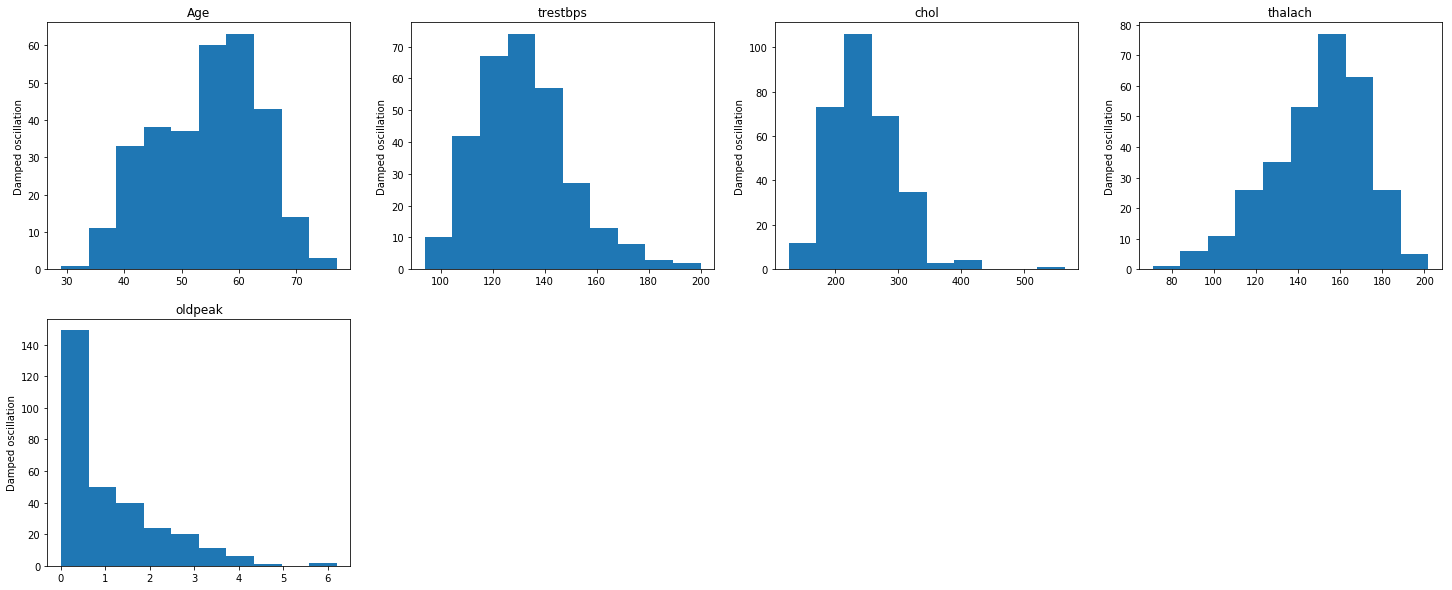

In [140]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])


plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('Damped oscillation')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('Damped oscillation')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('Damped oscillation')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('Damped oscillation')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('Damped oscillation')

plt.show()

Text(0.5,1,'Target')

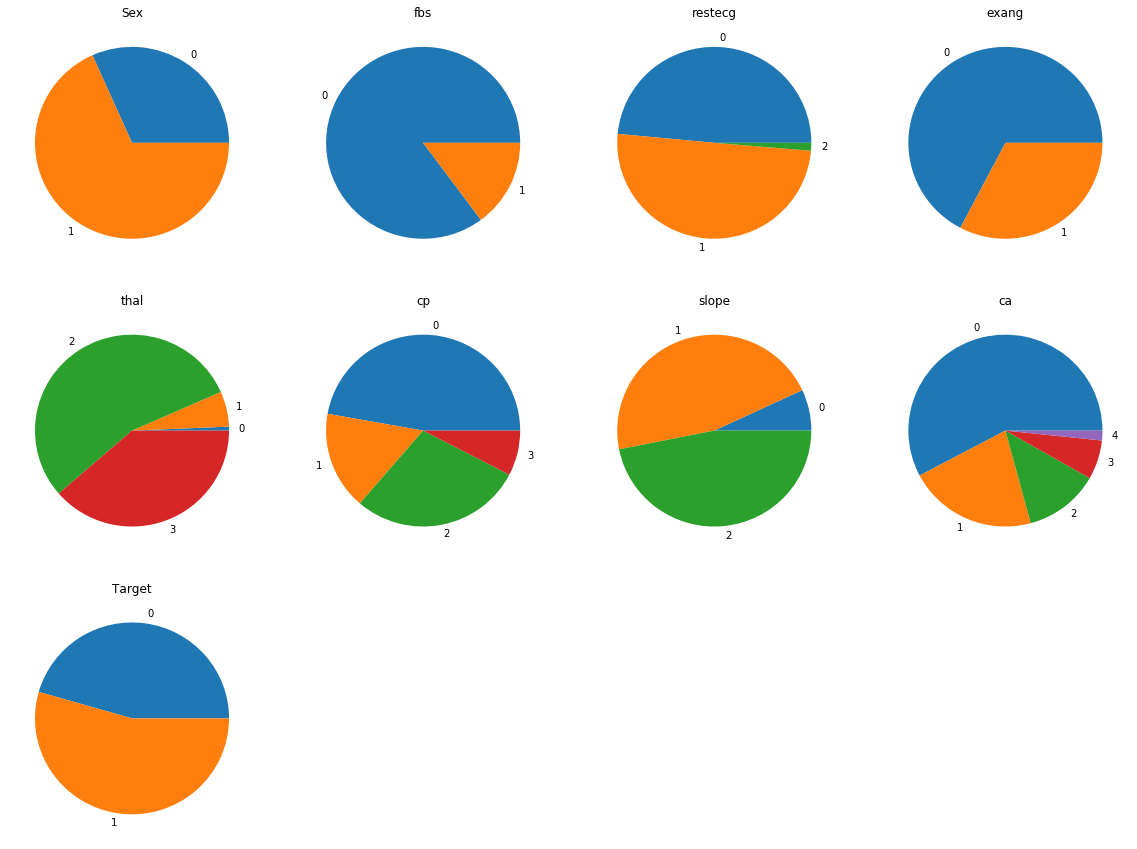

In [141]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0", "1"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels)
plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels)
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels)
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels)
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["0", "1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels)
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels)
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels)
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels)
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0", "1"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels)
plt.title('Target')



In [142]:
from sklearn.model_selection import train_test_split

# Create a new array with the added features: features_two
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2, train_size=0.28)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((84, 13), (84,))
((61, 13), (61,))


# Trees

In [143]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5)
#model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, random_state = 1)
# model1 = tree.DecisionTreeClassifier()

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
from sklearn.metrics import confusion_matrix
print(confusion_matrix(model1.predict(testX), testY))


from sklearn import metrics

y_pred = model1.predict(testX)
print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

importances = model1.feature_importances_



Train: 0.9166666666666666
Test: 0.6885245901639344
[[20 10]
 [ 9 22]]
[1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0]


(array([0.06873655, 0.43523316, 0.09626943, 0.04145078, 0.00863558,
       0.15049521, 0.        , 0.        , 0.        , 0.        ,
       0.09259158, 0.        , 0.10658771]), 0.7788778877887789)


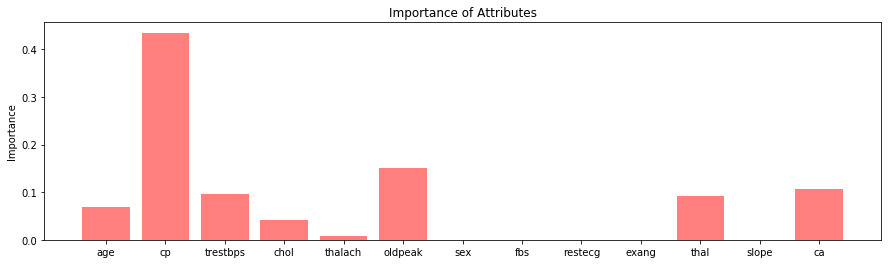

In [144]:
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

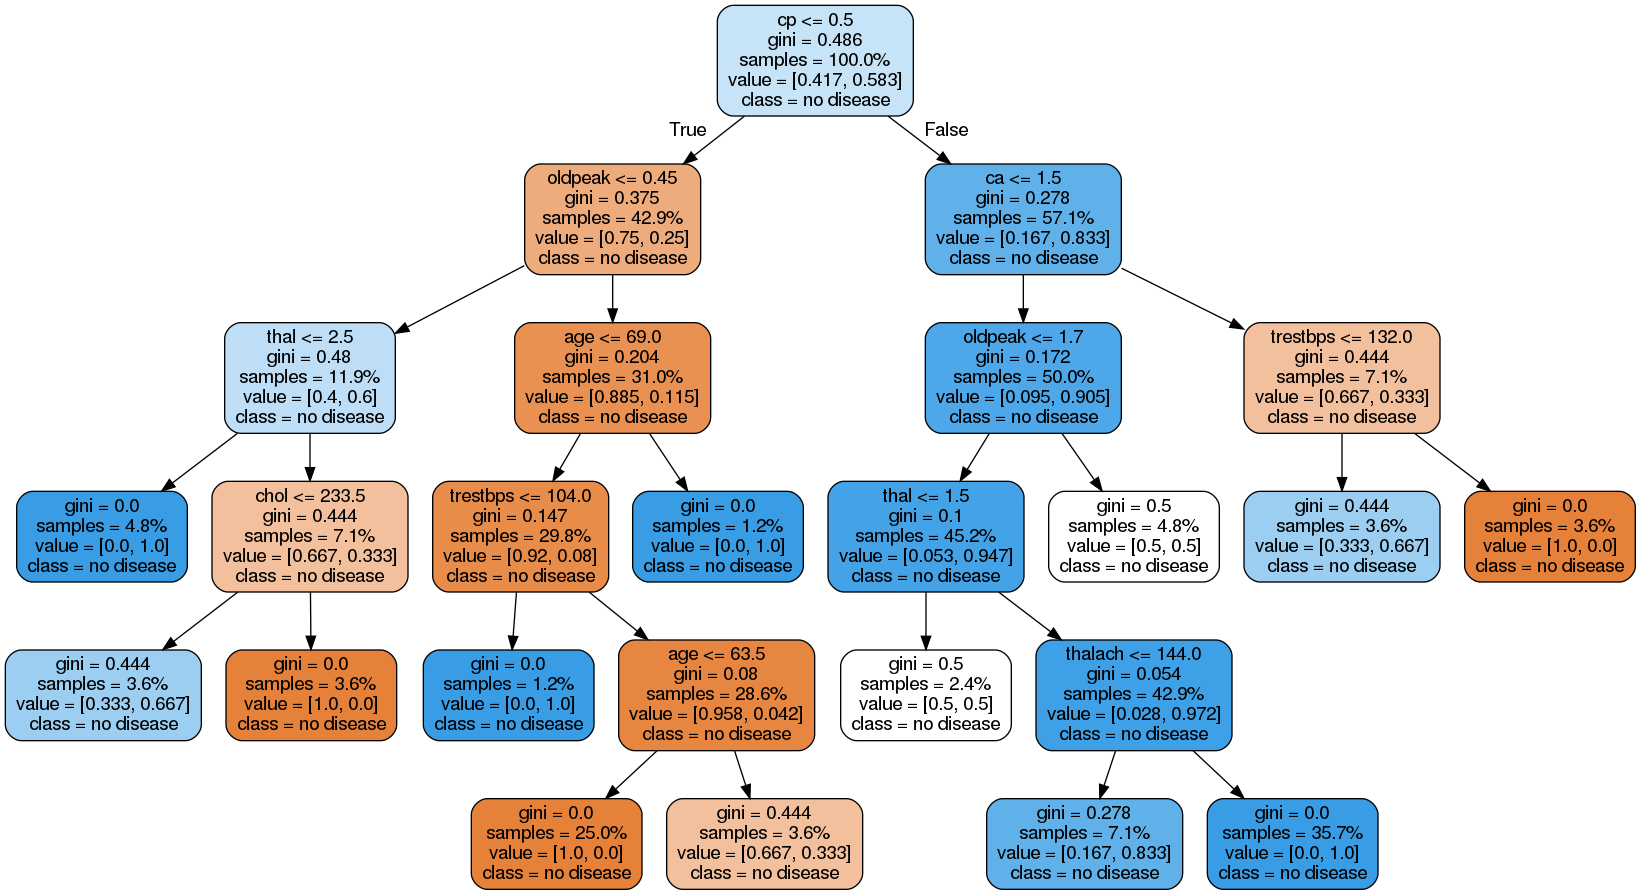

In [145]:

# c = -1;
# for i in importances:
#     c = c + 1
#     if(i == 0.0):
#         features_col.remove(features_col[c])
#         c = c - 1
    
        
        
# print(features_col)

y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename = 'tree.png')

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('tree.png')
Image(graph.create_png())


# Naive Bayes

In [146]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

model2 = gnb.fit(trainX, trainY)

#Print the score on the train data
print(model2.score(trainX, trainY))
#Print the score on the test data
print(model2.score(testX, testY))

y_pred2 = model2.predict(testX)
print(y_pred2)
print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
print(metrics.classification_report(testY, y_pred2))
from sklearn.metrics import confusion_matrix

confusion_matrix(model2.predict(testX), testY)

0.8571428571428571
0.819672131147541
[1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0]
('Accuracy: ', 0.819672131147541)
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.78      0.91      0.84        32

   micro avg       0.82      0.82      0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



array([[21,  3],
       [ 8, 29]])

# Neural Network

In [147]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (1), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

On training
0.8928571428571429
[[30  4]
 [ 5 45]]

On test
0.819672131147541
[[21  3]
 [ 8 29]]


In [148]:
red = Sequential()
red.add(Dense(20, input_dim=13, activation='sigmoid'))
red.add(Dense(10, activation='sigmoid'))


# red.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
red.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# red.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
# red.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


red.fit(trainX, trainY, epochs=2000)

scoreT = red.evaluate(testX, testY)
scoreE = red.evaluate(trainX, trainY)

print("Score del test")
print("%s: %.2f%%" % (red.metrics_names[1], scoreT[1]*100))
print("Score del entrenamiento")
print("%s: %.2f%%" % (red.metrics_names[1], scoreE[1]*100))




Epoch 1/2000
84/84 [==============================] - 1s 12ms/step - loss: 2.6195 - binary_accuracy: 0.5083
Epoch 2/2000
84/84 [==============================] - 0s 90us/step - loss: 2.5967 - binary_accuracy: 0.4905
Epoch 3/2000
84/84 [==============================] - 0s 120us/step - loss: 2.5717 - binary_accuracy: 0.4786
Epoch 4/2000
84/84 [==============================] - 0s 141us/step - loss: 2.5458 - binary_accuracy: 0.4798
Epoch 5/2000
84/84 [==============================] - 0s 128us/step - loss: 2.5199 - binary_accuracy: 0.4619
Epoch 6/2000
84/84 [==============================] - 0s 108us/step - loss: 2.4938 - binary_accuracy: 0.4607
Epoch 7/2000
84/84 [==============================] - 0s 188us/step - loss: 2.4688 - binary_accuracy: 0.4595
Epoch 8/2000
84/84 [==============================] - 0s 175us/step - loss: 2.4437 - binary_accuracy: 0.4607
Epoch 9/2000
84/84 [==============================] - 0s 109us/step - loss: 2.4197 - binary_accuracy: 0.4607
Epoch 10/2000
84/84 [

84/84 [==============================] - 0s 103us/step - loss: 1.3158 - binary_accuracy: 0.4500
Epoch 76/2000
84/84 [==============================] - 0s 77us/step - loss: 1.3029 - binary_accuracy: 0.4500
Epoch 77/2000
84/84 [==============================] - 0s 115us/step - loss: 1.2902 - binary_accuracy: 0.4500
Epoch 78/2000
84/84 [==============================] - 0s 81us/step - loss: 1.2779 - binary_accuracy: 0.4500
Epoch 79/2000
84/84 [==============================] - 0s 81us/step - loss: 1.2658 - binary_accuracy: 0.4500
Epoch 80/2000
84/84 [==============================] - 0s 94us/step - loss: 1.2540 - binary_accuracy: 0.4500
Epoch 81/2000
84/84 [==============================] - 0s 93us/step - loss: 1.2426 - binary_accuracy: 0.4500
Epoch 82/2000
84/84 [==============================] - 0s 84us/step - loss: 1.2313 - binary_accuracy: 0.4500
Epoch 83/2000
84/84 [==============================] - 0s 99us/step - loss: 1.2204 - binary_accuracy: 0.4500
Epoch 84/2000
84/84 [==========

84/84 [==============================] - 0s 116us/step - loss: 0.8653 - binary_accuracy: 0.4500
Epoch 150/2000
84/84 [==============================] - 0s 107us/step - loss: 0.8630 - binary_accuracy: 0.4500
Epoch 151/2000
84/84 [==============================] - 0s 142us/step - loss: 0.8607 - binary_accuracy: 0.4500
Epoch 152/2000
84/84 [==============================] - 0s 81us/step - loss: 0.8585 - binary_accuracy: 0.4500
Epoch 153/2000
84/84 [==============================] - 0s 84us/step - loss: 0.8563 - binary_accuracy: 0.4500
Epoch 154/2000
84/84 [==============================] - 0s 100us/step - loss: 0.8542 - binary_accuracy: 0.4500
Epoch 155/2000
84/84 [==============================] - 0s 89us/step - loss: 0.8521 - binary_accuracy: 0.4500
Epoch 156/2000
84/84 [==============================] - 0s 90us/step - loss: 0.8500 - binary_accuracy: 0.4500
Epoch 157/2000
84/84 [==============================] - 0s 98us/step - loss: 0.8480 - binary_accuracy: 0.4500
Epoch 158/2000
84/84 

84/84 [==============================] - 0s 185us/step - loss: 0.7679 - binary_accuracy: 0.4500
Epoch 224/2000
84/84 [==============================] - 0s 168us/step - loss: 0.7672 - binary_accuracy: 0.4500
Epoch 225/2000
84/84 [==============================] - 0s 205us/step - loss: 0.7664 - binary_accuracy: 0.4500
Epoch 226/2000
84/84 [==============================] - 0s 100us/step - loss: 0.7657 - binary_accuracy: 0.4500
Epoch 227/2000
84/84 [==============================] - 0s 109us/step - loss: 0.7651 - binary_accuracy: 0.4500
Epoch 228/2000
84/84 [==============================] - 0s 109us/step - loss: 0.7644 - binary_accuracy: 0.4500
Epoch 229/2000
84/84 [==============================] - 0s 135us/step - loss: 0.7637 - binary_accuracy: 0.4500
Epoch 230/2000
84/84 [==============================] - 0s 102us/step - loss: 0.7630 - binary_accuracy: 0.4500
Epoch 231/2000
84/84 [==============================] - 0s 113us/step - loss: 0.7624 - binary_accuracy: 0.4500
Epoch 232/2000
8

84/84 [==============================] - 0s 129us/step - loss: 0.7321 - binary_accuracy: 0.4500
Epoch 297/2000
84/84 [==============================] - 0s 127us/step - loss: 0.7318 - binary_accuracy: 0.4500
Epoch 298/2000
84/84 [==============================] - 0s 83us/step - loss: 0.7315 - binary_accuracy: 0.4500
Epoch 299/2000
84/84 [==============================] - 0s 114us/step - loss: 0.7312 - binary_accuracy: 0.4500
Epoch 300/2000
84/84 [==============================] - 0s 85us/step - loss: 0.7308 - binary_accuracy: 0.4500
Epoch 301/2000
84/84 [==============================] - 0s 121us/step - loss: 0.7305 - binary_accuracy: 0.4500
Epoch 302/2000
84/84 [==============================] - 0s 115us/step - loss: 0.7302 - binary_accuracy: 0.4500
Epoch 303/2000
84/84 [==============================] - 0s 99us/step - loss: 0.7299 - binary_accuracy: 0.4500
Epoch 304/2000
84/84 [==============================] - 0s 120us/step - loss: 0.7296 - binary_accuracy: 0.4500
Epoch 305/2000
84/8

84/84 [==============================] - 0s 102us/step - loss: 0.6948 - binary_accuracy: 0.4500
Epoch 371/2000
84/84 [==============================] - 0s 113us/step - loss: 0.6944 - binary_accuracy: 0.4500
Epoch 372/2000
84/84 [==============================] - 0s 135us/step - loss: 0.6939 - binary_accuracy: 0.4500
Epoch 373/2000
84/84 [==============================] - 0s 116us/step - loss: 0.6934 - binary_accuracy: 0.4500
Epoch 374/2000
84/84 [==============================] - 0s 80us/step - loss: 0.6932 - binary_accuracy: 0.4500
Epoch 375/2000
84/84 [==============================] - 0s 123us/step - loss: 0.6924 - binary_accuracy: 0.4500
Epoch 376/2000
84/84 [==============================] - 0s 125us/step - loss: 0.6920 - binary_accuracy: 0.4500
Epoch 377/2000
84/84 [==============================] - 0s 133us/step - loss: 0.6916 - binary_accuracy: 0.4500
Epoch 378/2000
84/84 [==============================] - 0s 122us/step - loss: 0.6913 - binary_accuracy: 0.4500
Epoch 379/2000
84

84/84 [==============================] - 0s 128us/step - loss: 0.6550 - binary_accuracy: 0.4190
Epoch 444/2000
84/84 [==============================] - 0s 111us/step - loss: 0.6541 - binary_accuracy: 0.4190
Epoch 445/2000
84/84 [==============================] - 0s 117us/step - loss: 0.6546 - binary_accuracy: 0.4190
Epoch 446/2000
84/84 [==============================] - 0s 115us/step - loss: 0.6539 - binary_accuracy: 0.4202
Epoch 447/2000
84/84 [==============================] - 0s 122us/step - loss: 0.6531 - binary_accuracy: 0.4202
Epoch 448/2000
84/84 [==============================] - 0s 86us/step - loss: 0.6523 - binary_accuracy: 0.4190
Epoch 449/2000
84/84 [==============================] - 0s 138us/step - loss: 0.6527 - binary_accuracy: 0.4202
Epoch 450/2000
84/84 [==============================] - 0s 112us/step - loss: 0.6525 - binary_accuracy: 0.4190
Epoch 451/2000
84/84 [==============================] - 0s 94us/step - loss: 0.6518 - binary_accuracy: 0.4190
Epoch 452/2000
84/

84/84 [==============================] - 0s 145us/step - loss: 0.6292 - binary_accuracy: 0.4179
Epoch 518/2000
84/84 [==============================] - 0s 131us/step - loss: 0.6289 - binary_accuracy: 0.4190
Epoch 519/2000
84/84 [==============================] - 0s 99us/step - loss: 0.6286 - binary_accuracy: 0.4190
Epoch 520/2000
84/84 [==============================] - 0s 99us/step - loss: 0.6285 - binary_accuracy: 0.4190
Epoch 521/2000
84/84 [==============================] - 0s 132us/step - loss: 0.6276 - binary_accuracy: 0.4179
Epoch 522/2000
84/84 [==============================] - 0s 113us/step - loss: 0.6278 - binary_accuracy: 0.4179
Epoch 523/2000
84/84 [==============================] - 0s 121us/step - loss: 0.6281 - binary_accuracy: 0.4190
Epoch 524/2000
84/84 [==============================] - 0s 149us/step - loss: 0.6269 - binary_accuracy: 0.4190
Epoch 525/2000
84/84 [==============================] - 0s 165us/step - loss: 0.6273 - binary_accuracy: 0.4179
Epoch 526/2000
84/

84/84 [==============================] - 0s 112us/step - loss: 0.6064 - binary_accuracy: 0.4190
Epoch 592/2000
84/84 [==============================] - 0s 105us/step - loss: 0.6066 - binary_accuracy: 0.4190
Epoch 593/2000
84/84 [==============================] - 0s 111us/step - loss: 0.6057 - binary_accuracy: 0.4190
Epoch 594/2000
84/84 [==============================] - 0s 162us/step - loss: 0.6054 - binary_accuracy: 0.4179
Epoch 595/2000
84/84 [==============================] - 0s 128us/step - loss: 0.6054 - binary_accuracy: 0.4190
Epoch 596/2000
84/84 [==============================] - 0s 96us/step - loss: 0.6054 - binary_accuracy: 0.4190
Epoch 597/2000
84/84 [==============================] - 0s 84us/step - loss: 0.6047 - binary_accuracy: 0.4179
Epoch 598/2000
84/84 [==============================] - 0s 129us/step - loss: 0.6043 - binary_accuracy: 0.4179
Epoch 599/2000
84/84 [==============================] - 0s 91us/step - loss: 0.6036 - binary_accuracy: 0.4190
Epoch 600/2000
84/8

84/84 [==============================] - 0s 112us/step - loss: 0.5780 - binary_accuracy: 0.4179
Epoch 665/2000
84/84 [==============================] - 0s 91us/step - loss: 0.5780 - binary_accuracy: 0.4179
Epoch 666/2000
84/84 [==============================] - 0s 93us/step - loss: 0.5763 - binary_accuracy: 0.4179
Epoch 667/2000
84/84 [==============================] - 0s 119us/step - loss: 0.5781 - binary_accuracy: 0.4190
Epoch 668/2000
84/84 [==============================] - 0s 81us/step - loss: 0.5760 - binary_accuracy: 0.4190
Epoch 669/2000
84/84 [==============================] - 0s 116us/step - loss: 0.5759 - binary_accuracy: 0.4179
Epoch 670/2000
84/84 [==============================] - 0s 132us/step - loss: 0.5745 - binary_accuracy: 0.4190
Epoch 671/2000
84/84 [==============================] - 0s 87us/step - loss: 0.5764 - binary_accuracy: 0.4202
Epoch 672/2000
84/84 [==============================] - 0s 105us/step - loss: 0.5741 - binary_accuracy: 0.4202
Epoch 673/2000
84/84

84/84 [==============================] - 0s 98us/step - loss: 0.5380 - binary_accuracy: 0.4310
Epoch 738/2000
84/84 [==============================] - 0s 114us/step - loss: 0.5377 - binary_accuracy: 0.4333
Epoch 739/2000
84/84 [==============================] - 0s 103us/step - loss: 0.5373 - binary_accuracy: 0.4333
Epoch 740/2000
84/84 [==============================] - 0s 109us/step - loss: 0.5387 - binary_accuracy: 0.4321
Epoch 741/2000
84/84 [==============================] - 0s 97us/step - loss: 0.5363 - binary_accuracy: 0.4321
Epoch 742/2000
84/84 [==============================] - 0s 129us/step - loss: 0.5378 - binary_accuracy: 0.4310
Epoch 743/2000
84/84 [==============================] - 0s 149us/step - loss: 0.5365 - binary_accuracy: 0.4333
Epoch 744/2000
84/84 [==============================] - 0s 121us/step - loss: 0.5353 - binary_accuracy: 0.4310
Epoch 745/2000
84/84 [==============================] - 0s 101us/step - loss: 0.5337 - binary_accuracy: 0.4310
Epoch 746/2000
84/

84/84 [==============================] - 0s 130us/step - loss: 0.5017 - binary_accuracy: 0.4310
Epoch 812/2000
84/84 [==============================] - 0s 94us/step - loss: 0.5019 - binary_accuracy: 0.4321
Epoch 813/2000
84/84 [==============================] - 0s 122us/step - loss: 0.5023 - binary_accuracy: 0.4310
Epoch 814/2000
84/84 [==============================] - 0s 103us/step - loss: 0.5018 - binary_accuracy: 0.4321
Epoch 815/2000
84/84 [==============================] - 0s 117us/step - loss: 0.5006 - binary_accuracy: 0.4286
Epoch 816/2000
84/84 [==============================] - 0s 132us/step - loss: 0.4998 - binary_accuracy: 0.4310
Epoch 817/2000
84/84 [==============================] - 0s 141us/step - loss: 0.5038 - binary_accuracy: 0.4310
Epoch 818/2000
84/84 [==============================] - 0s 96us/step - loss: 0.5017 - binary_accuracy: 0.4321
Epoch 819/2000
84/84 [==============================] - 0s 155us/step - loss: 0.4993 - binary_accuracy: 0.4298
Epoch 820/2000
84/

84/84 [==============================] - 0s 114us/step - loss: 0.4768 - binary_accuracy: 0.4548
Epoch 885/2000
84/84 [==============================] - 0s 116us/step - loss: 0.4764 - binary_accuracy: 0.4536
Epoch 886/2000
84/84 [==============================] - 0s 91us/step - loss: 0.4778 - binary_accuracy: 0.4548
Epoch 887/2000
84/84 [==============================] - 0s 128us/step - loss: 0.4755 - binary_accuracy: 0.4536
Epoch 888/2000
84/84 [==============================] - 0s 131us/step - loss: 0.4793 - binary_accuracy: 0.4536
Epoch 889/2000
84/84 [==============================] - 0s 88us/step - loss: 0.4758 - binary_accuracy: 0.4536
Epoch 890/2000
84/84 [==============================] - 0s 137us/step - loss: 0.4740 - binary_accuracy: 0.4524
Epoch 891/2000
84/84 [==============================] - 0s 138us/step - loss: 0.4747 - binary_accuracy: 0.4512
Epoch 892/2000
84/84 [==============================] - 0s 127us/step - loss: 0.4735 - binary_accuracy: 0.4512
Epoch 893/2000
84/

84/84 [==============================] - 0s 98us/step - loss: 0.4437 - binary_accuracy: 0.4524
Epoch 959/2000
84/84 [==============================] - 0s 86us/step - loss: 0.4432 - binary_accuracy: 0.4524
Epoch 960/2000
84/84 [==============================] - 0s 113us/step - loss: 0.4474 - binary_accuracy: 0.4524
Epoch 961/2000
84/84 [==============================] - 0s 130us/step - loss: 0.4445 - binary_accuracy: 0.4524
Epoch 962/2000
84/84 [==============================] - 0s 92us/step - loss: 0.4424 - binary_accuracy: 0.4512
Epoch 963/2000
84/84 [==============================] - 0s 130us/step - loss: 0.4405 - binary_accuracy: 0.4512
Epoch 964/2000
84/84 [==============================] - 0s 153us/step - loss: 0.4403 - binary_accuracy: 0.4512
Epoch 965/2000
84/84 [==============================] - 0s 103us/step - loss: 0.4425 - binary_accuracy: 0.4512
Epoch 966/2000
84/84 [==============================] - 0s 93us/step - loss: 0.4403 - binary_accuracy: 0.4524
Epoch 967/2000
84/84

84/84 [==============================] - 0s 118us/step - loss: 0.4256 - binary_accuracy: 0.4488
Epoch 1032/2000
84/84 [==============================] - 0s 94us/step - loss: 0.4269 - binary_accuracy: 0.4500
Epoch 1033/2000
84/84 [==============================] - 0s 110us/step - loss: 0.4243 - binary_accuracy: 0.4476
Epoch 1034/2000
84/84 [==============================] - 0s 150us/step - loss: 0.4249 - binary_accuracy: 0.4488
Epoch 1035/2000
84/84 [==============================] - 0s 116us/step - loss: 0.4236 - binary_accuracy: 0.4488
Epoch 1036/2000
84/84 [==============================] - 0s 87us/step - loss: 0.4230 - binary_accuracy: 0.4488
Epoch 1037/2000
84/84 [==============================] - 0s 119us/step - loss: 0.4236 - binary_accuracy: 0.4488
Epoch 1038/2000
84/84 [==============================] - 0s 137us/step - loss: 0.4228 - binary_accuracy: 0.4476
Epoch 1039/2000
84/84 [==============================] - 0s 124us/step - loss: 0.4236 - binary_accuracy: 0.4464
Epoch 1040

84/84 [==============================] - 0s 173us/step - loss: 0.4056 - binary_accuracy: 0.4429
Epoch 1105/2000
84/84 [==============================] - 0s 120us/step - loss: 0.4056 - binary_accuracy: 0.4429
Epoch 1106/2000
84/84 [==============================] - 0s 132us/step - loss: 0.4059 - binary_accuracy: 0.4429
Epoch 1107/2000
84/84 [==============================] - 0s 96us/step - loss: 0.4045 - binary_accuracy: 0.4429
Epoch 1108/2000
84/84 [==============================] - 0s 149us/step - loss: 0.4057 - binary_accuracy: 0.4429
Epoch 1109/2000
84/84 [==============================] - 0s 143us/step - loss: 0.4039 - binary_accuracy: 0.4429
Epoch 1110/2000
84/84 [==============================] - 0s 93us/step - loss: 0.4046 - binary_accuracy: 0.4440
Epoch 1111/2000
84/84 [==============================] - 0s 113us/step - loss: 0.4031 - binary_accuracy: 0.4440
Epoch 1112/2000
84/84 [==============================] - 0s 134us/step - loss: 0.4036 - binary_accuracy: 0.4429
Epoch 1113

84/84 [==============================] - 0s 197us/step - loss: 0.3802 - binary_accuracy: 0.4417
Epoch 1177/2000
84/84 [==============================] - 0s 111us/step - loss: 0.3816 - binary_accuracy: 0.4417
Epoch 1178/2000
84/84 [==============================] - 0s 81us/step - loss: 0.3813 - binary_accuracy: 0.4417
Epoch 1179/2000
84/84 [==============================] - 0s 86us/step - loss: 0.3789 - binary_accuracy: 0.4393
Epoch 1180/2000
84/84 [==============================] - 0s 71us/step - loss: 0.3781 - binary_accuracy: 0.4381
Epoch 1181/2000
84/84 [==============================] - 0s 84us/step - loss: 0.3773 - binary_accuracy: 0.4381
Epoch 1182/2000
84/84 [==============================] - 0s 77us/step - loss: 0.3764 - binary_accuracy: 0.4393
Epoch 1183/2000
84/84 [==============================] - 0s 72us/step - loss: 0.3764 - binary_accuracy: 0.4417
Epoch 1184/2000
84/84 [==============================] - 0s 78us/step - loss: 0.3770 - binary_accuracy: 0.4417
Epoch 1185/2000

84/84 [==============================] - 0s 106us/step - loss: 0.3600 - binary_accuracy: 0.4310
Epoch 1250/2000
84/84 [==============================] - 0s 83us/step - loss: 0.3596 - binary_accuracy: 0.4310
Epoch 1251/2000
84/84 [==============================] - 0s 108us/step - loss: 0.3579 - binary_accuracy: 0.4321
Epoch 1252/2000
84/84 [==============================] - 0s 123us/step - loss: 0.3577 - binary_accuracy: 0.4333
Epoch 1253/2000
84/84 [==============================] - 0s 130us/step - loss: 0.3613 - binary_accuracy: 0.4321
Epoch 1254/2000
84/84 [==============================] - 0s 102us/step - loss: 0.3569 - binary_accuracy: 0.4310
Epoch 1255/2000
84/84 [==============================] - 0s 116us/step - loss: 0.3598 - binary_accuracy: 0.4286
Epoch 1256/2000
84/84 [==============================] - 0s 127us/step - loss: 0.3584 - binary_accuracy: 0.4274
Epoch 1257/2000
84/84 [==============================] - 0s 102us/step - loss: 0.3561 - binary_accuracy: 0.4298
Epoch 125

Epoch 1322/2000
84/84 [==============================] - 0s 98us/step - loss: 0.3392 - binary_accuracy: 0.4167
Epoch 1323/2000
84/84 [==============================] - 0s 120us/step - loss: 0.3395 - binary_accuracy: 0.4167
Epoch 1324/2000
84/84 [==============================] - 0s 135us/step - loss: 0.3381 - binary_accuracy: 0.4167
Epoch 1325/2000
84/84 [==============================] - 0s 134us/step - loss: 0.3371 - binary_accuracy: 0.4167
Epoch 1326/2000
84/84 [==============================] - 0s 103us/step - loss: 0.3377 - binary_accuracy: 0.4167
Epoch 1327/2000
84/84 [==============================] - 0s 134us/step - loss: 0.3369 - binary_accuracy: 0.4167
Epoch 1328/2000
84/84 [==============================] - 0s 246us/step - loss: 0.3367 - binary_accuracy: 0.4167
Epoch 1329/2000
84/84 [==============================] - 0s 154us/step - loss: 0.3388 - binary_accuracy: 0.4167
Epoch 1330/2000
84/84 [==============================] - 0s 237us/step - loss: 0.3390 - binary_accuracy: 

84/84 [==============================] - 0s 144us/step - loss: 0.3227 - binary_accuracy: 0.4167
Epoch 1395/2000
84/84 [==============================] - 0s 107us/step - loss: 0.3274 - binary_accuracy: 0.4167
Epoch 1396/2000
84/84 [==============================] - 0s 91us/step - loss: 0.3243 - binary_accuracy: 0.4167
Epoch 1397/2000
84/84 [==============================] - 0s 178us/step - loss: 0.3206 - binary_accuracy: 0.4167
Epoch 1398/2000
84/84 [==============================] - 0s 130us/step - loss: 0.3217 - binary_accuracy: 0.4167
Epoch 1399/2000
84/84 [==============================] - 0s 161us/step - loss: 0.3248 - binary_accuracy: 0.4167
Epoch 1400/2000
84/84 [==============================] - 0s 135us/step - loss: 0.3189 - binary_accuracy: 0.4167
Epoch 1401/2000
84/84 [==============================] - 0s 142us/step - loss: 0.3193 - binary_accuracy: 0.4167
Epoch 1402/2000
84/84 [==============================] - 0s 114us/step - loss: 0.3210 - binary_accuracy: 0.4167
Epoch 140

84/84 [==============================] - 0s 158us/step - loss: 0.3098 - binary_accuracy: 0.4167
Epoch 1468/2000
84/84 [==============================] - 0s 167us/step - loss: 0.3095 - binary_accuracy: 0.4167
Epoch 1469/2000
84/84 [==============================] - 0s 108us/step - loss: 0.3118 - binary_accuracy: 0.4167
Epoch 1470/2000
84/84 [==============================] - 0s 100us/step - loss: 0.3086 - binary_accuracy: 0.4167
Epoch 1471/2000
84/84 [==============================] - 0s 145us/step - loss: 0.3080 - binary_accuracy: 0.4167
Epoch 1472/2000
84/84 [==============================] - 0s 119us/step - loss: 0.3094 - binary_accuracy: 0.4167
Epoch 1473/2000
84/84 [==============================] - 0s 90us/step - loss: 0.3089 - binary_accuracy: 0.4167
Epoch 1474/2000
84/84 [==============================] - 0s 108us/step - loss: 0.3093 - binary_accuracy: 0.4167
Epoch 1475/2000
84/84 [==============================] - 0s 133us/step - loss: 0.3078 - binary_accuracy: 0.4167
Epoch 147

84/84 [==============================] - 0s 125us/step - loss: 0.3067 - binary_accuracy: 0.4167
Epoch 1541/2000
84/84 [==============================] - 0s 139us/step - loss: 0.3006 - binary_accuracy: 0.4167
Epoch 1542/2000
84/84 [==============================] - 0s 112us/step - loss: 0.2993 - binary_accuracy: 0.4167
Epoch 1543/2000
84/84 [==============================] - 0s 134us/step - loss: 0.3056 - binary_accuracy: 0.4167
Epoch 1544/2000
84/84 [==============================] - 0s 124us/step - loss: 0.2975 - binary_accuracy: 0.4167
Epoch 1545/2000
84/84 [==============================] - 0s 129us/step - loss: 0.3020 - binary_accuracy: 0.4167
Epoch 1546/2000
84/84 [==============================] - 0s 123us/step - loss: 0.3033 - binary_accuracy: 0.4167
Epoch 1547/2000
84/84 [==============================] - 0s 112us/step - loss: 0.3066 - binary_accuracy: 0.4167
Epoch 1548/2000
84/84 [==============================] - 0s 132us/step - loss: 0.2996 - binary_accuracy: 0.4167
Epoch 15

84/84 [==============================] - 0s 166us/step - loss: 0.2922 - binary_accuracy: 0.4167
Epoch 1614/2000
84/84 [==============================] - 0s 97us/step - loss: 0.2902 - binary_accuracy: 0.4167
Epoch 1615/2000
84/84 [==============================] - 0s 154us/step - loss: 0.2910 - binary_accuracy: 0.4167
Epoch 1616/2000
84/84 [==============================] - 0s 96us/step - loss: 0.2910 - binary_accuracy: 0.4167
Epoch 1617/2000
84/84 [==============================] - 0s 148us/step - loss: 0.2962 - binary_accuracy: 0.4167
Epoch 1618/2000
84/84 [==============================] - 0s 168us/step - loss: 0.2867 - binary_accuracy: 0.4167
Epoch 1619/2000
84/84 [==============================] - 0s 124us/step - loss: 0.2966 - binary_accuracy: 0.4167
Epoch 1620/2000
84/84 [==============================] - 0s 90us/step - loss: 0.2950 - binary_accuracy: 0.4167
Epoch 1621/2000
84/84 [==============================] - 0s 100us/step - loss: 0.2885 - binary_accuracy: 0.4167
Epoch 1622/

84/84 [==============================] - 0s 176us/step - loss: 0.2873 - binary_accuracy: 0.4167
Epoch 1687/2000
84/84 [==============================] - 0s 115us/step - loss: 0.2896 - binary_accuracy: 0.4167
Epoch 1688/2000
84/84 [==============================] - 0s 124us/step - loss: 0.2860 - binary_accuracy: 0.4167
Epoch 1689/2000
84/84 [==============================] - 0s 218us/step - loss: 0.2878 - binary_accuracy: 0.4167
Epoch 1690/2000
84/84 [==============================] - 0s 237us/step - loss: 0.2858 - binary_accuracy: 0.4167
Epoch 1691/2000
84/84 [==============================] - 0s 126us/step - loss: 0.2941 - binary_accuracy: 0.4167
Epoch 1692/2000
84/84 [==============================] - 0s 189us/step - loss: 0.2817 - binary_accuracy: 0.4167
Epoch 1693/2000
84/84 [==============================] - 0s 120us/step - loss: 0.2882 - binary_accuracy: 0.4167
Epoch 1694/2000
84/84 [==============================] - 0s 168us/step - loss: 0.2945 - binary_accuracy: 0.4167
Epoch 16

84/84 [==============================] - 0s 154us/step - loss: 0.2810 - binary_accuracy: 0.4167
Epoch 1760/2000
84/84 [==============================] - 0s 189us/step - loss: 0.2820 - binary_accuracy: 0.4167
Epoch 1761/2000
84/84 [==============================] - 0s 141us/step - loss: 0.2841 - binary_accuracy: 0.4167
Epoch 1762/2000
84/84 [==============================] - 0s 154us/step - loss: 0.2838 - binary_accuracy: 0.4167
Epoch 1763/2000
84/84 [==============================] - 0s 117us/step - loss: 0.2868 - binary_accuracy: 0.4167
Epoch 1764/2000
84/84 [==============================] - 0s 97us/step - loss: 0.2861 - binary_accuracy: 0.4167
Epoch 1765/2000
84/84 [==============================] - 0s 154us/step - loss: 0.2807 - binary_accuracy: 0.4167
Epoch 1766/2000
84/84 [==============================] - 0s 162us/step - loss: 0.2860 - binary_accuracy: 0.4167
Epoch 1767/2000
84/84 [==============================] - 0s 137us/step - loss: 0.2842 - binary_accuracy: 0.4167
Epoch 176

84/84 [==============================] - 0s 113us/step - loss: 0.2787 - binary_accuracy: 0.4167
Epoch 1833/2000
84/84 [==============================] - 0s 85us/step - loss: 0.2786 - binary_accuracy: 0.4167
Epoch 1834/2000
84/84 [==============================] - 0s 121us/step - loss: 0.2778 - binary_accuracy: 0.4167
Epoch 1835/2000
84/84 [==============================] - 0s 193us/step - loss: 0.2821 - binary_accuracy: 0.4167
Epoch 1836/2000
84/84 [==============================] - 0s 138us/step - loss: 0.2813 - binary_accuracy: 0.4167
Epoch 1837/2000
84/84 [==============================] - 0s 155us/step - loss: 0.2810 - binary_accuracy: 0.4167
Epoch 1838/2000
84/84 [==============================] - 0s 176us/step - loss: 0.2793 - binary_accuracy: 0.4167
Epoch 1839/2000
84/84 [==============================] - 0s 203us/step - loss: 0.2783 - binary_accuracy: 0.4167
Epoch 1840/2000
84/84 [==============================] - 0s 134us/step - loss: 0.2778 - binary_accuracy: 0.4167
Epoch 184

84/84 [==============================] - 0s 137us/step - loss: 0.2754 - binary_accuracy: 0.4167
Epoch 1906/2000
84/84 [==============================] - 0s 113us/step - loss: 0.2758 - binary_accuracy: 0.4167
Epoch 1907/2000
84/84 [==============================] - 0s 103us/step - loss: 0.2771 - binary_accuracy: 0.4167
Epoch 1908/2000
84/84 [==============================] - 0s 138us/step - loss: 0.2764 - binary_accuracy: 0.4167
Epoch 1909/2000
84/84 [==============================] - 0s 89us/step - loss: 0.2768 - binary_accuracy: 0.4167
Epoch 1910/2000
84/84 [==============================] - 0s 93us/step - loss: 0.2780 - binary_accuracy: 0.4167
Epoch 1911/2000
84/84 [==============================] - 0s 151us/step - loss: 0.2761 - binary_accuracy: 0.4167
Epoch 1912/2000
84/84 [==============================] - 0s 155us/step - loss: 0.2761 - binary_accuracy: 0.4167
Epoch 1913/2000
84/84 [==============================] - 0s 152us/step - loss: 0.2752 - binary_accuracy: 0.4167
Epoch 1914

84/84 [==============================] - 0s 138us/step - loss: 0.2756 - binary_accuracy: 0.4167
Epoch 1979/2000
84/84 [==============================] - 0s 114us/step - loss: 0.2805 - binary_accuracy: 0.4167
Epoch 1980/2000
84/84 [==============================] - 0s 85us/step - loss: 0.2755 - binary_accuracy: 0.4167
Epoch 1981/2000
84/84 [==============================] - 0s 121us/step - loss: 0.2783 - binary_accuracy: 0.4167
Epoch 1982/2000
84/84 [==============================] - 0s 120us/step - loss: 0.2756 - binary_accuracy: 0.4167
Epoch 1983/2000
84/84 [==============================] - 0s 98us/step - loss: 0.2745 - binary_accuracy: 0.4167
Epoch 1984/2000
84/84 [==============================] - 0s 127us/step - loss: 0.2812 - binary_accuracy: 0.4167
Epoch 1985/2000
84/84 [==============================] - 0s 123us/step - loss: 0.2764 - binary_accuracy: 0.4167
Epoch 1986/2000
84/84 [==============================] - 0s 187us/step - loss: 0.2744 - binary_accuracy: 0.4167
Epoch 1987